In [21]:
# clone source code yolov7 về thư mục yolo v7
%cd /content/drive/MyDrive/YOLOV7
!git clone https://github.com/WongKinYiu/yolov7

/content/drive/MyDrive/YOLOV7
Cloning into 'yolov7'...
remote: Enumerating objects: 1185, done.
remote: Total 1185 (delta 0), reused 0 (delta 0), pack-reused 1185
Receiving objects: 100% (1185/1185), 74.22 MiB | 16.92 MiB/s, done.
Resolving deltas: 100% (511/511), done.
Updating files: 100% (108/108), done.


In [ ]:
# cài đặt các thư viện cần thiết để train YOLO V7
%cd /content/drive/MyDrive/YOLOV7/yolov7
!pip install -r requirements.txt

In [ ]:
# Tải weight pretrain về nhận diện
%cd /content/drive/MyDrive/YOLOV7/yolov7
# tạo thư mục pretrain
!mkdir pretrain
# chuyển vào thư mục pretrain
%cd pretrain
# tải weight về
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [24]:
%cd /content/drive/MyDrive/YOLOV7/yolov7
# tạo thư mục test img
!mkdir test_images
%cd test_images
!wget https://media.wired.com/photos/5eceec5684d586f61b4d6abb/4:3/w_1524,h_1143,c_limit/Transpo-AddisAbabastreet-464372138.jpg

/content/drive/MyDrive/YOLOV7/yolov7
/content/drive/MyDrive/YOLOV7/yolov7/test_images
--2023-06-15 04:14:21--  https://media.wired.com/photos/5eceec5684d586f61b4d6abb/4:3/w_1524,h_1143,c_limit/Transpo-AddisAbabastreet-464372138.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 486495 (475K) [image/jpeg]
Saving to: ‘Transpo-AddisAbabastreet-464372138.jpg’

Transpo-AddisAbabas 100%[===================>] 475.09K  --.-KB/s    in 0.03s   

2023-06-15 04:14:21 (13.8 MB/s) - ‘Transpo-AddisAbabastreet-464372138.jpg’ saved [486495/486495]



In [25]:
# nhận diện thửu với weight pretrain
%cd /content/drive/MyDrive/YOLOV7/yolov7
!python detect.py --weights pretrain/yolov7.pt --source test_images/Transpo-AddisAbabastreet-464372138.jpg

/content/drive/MyDrive/YOLOV7/yolov7
Namespace(weights=['pretrain/yolov7.pt'], source='test_images/Transpo-AddisAbabastreet-464372138.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # 

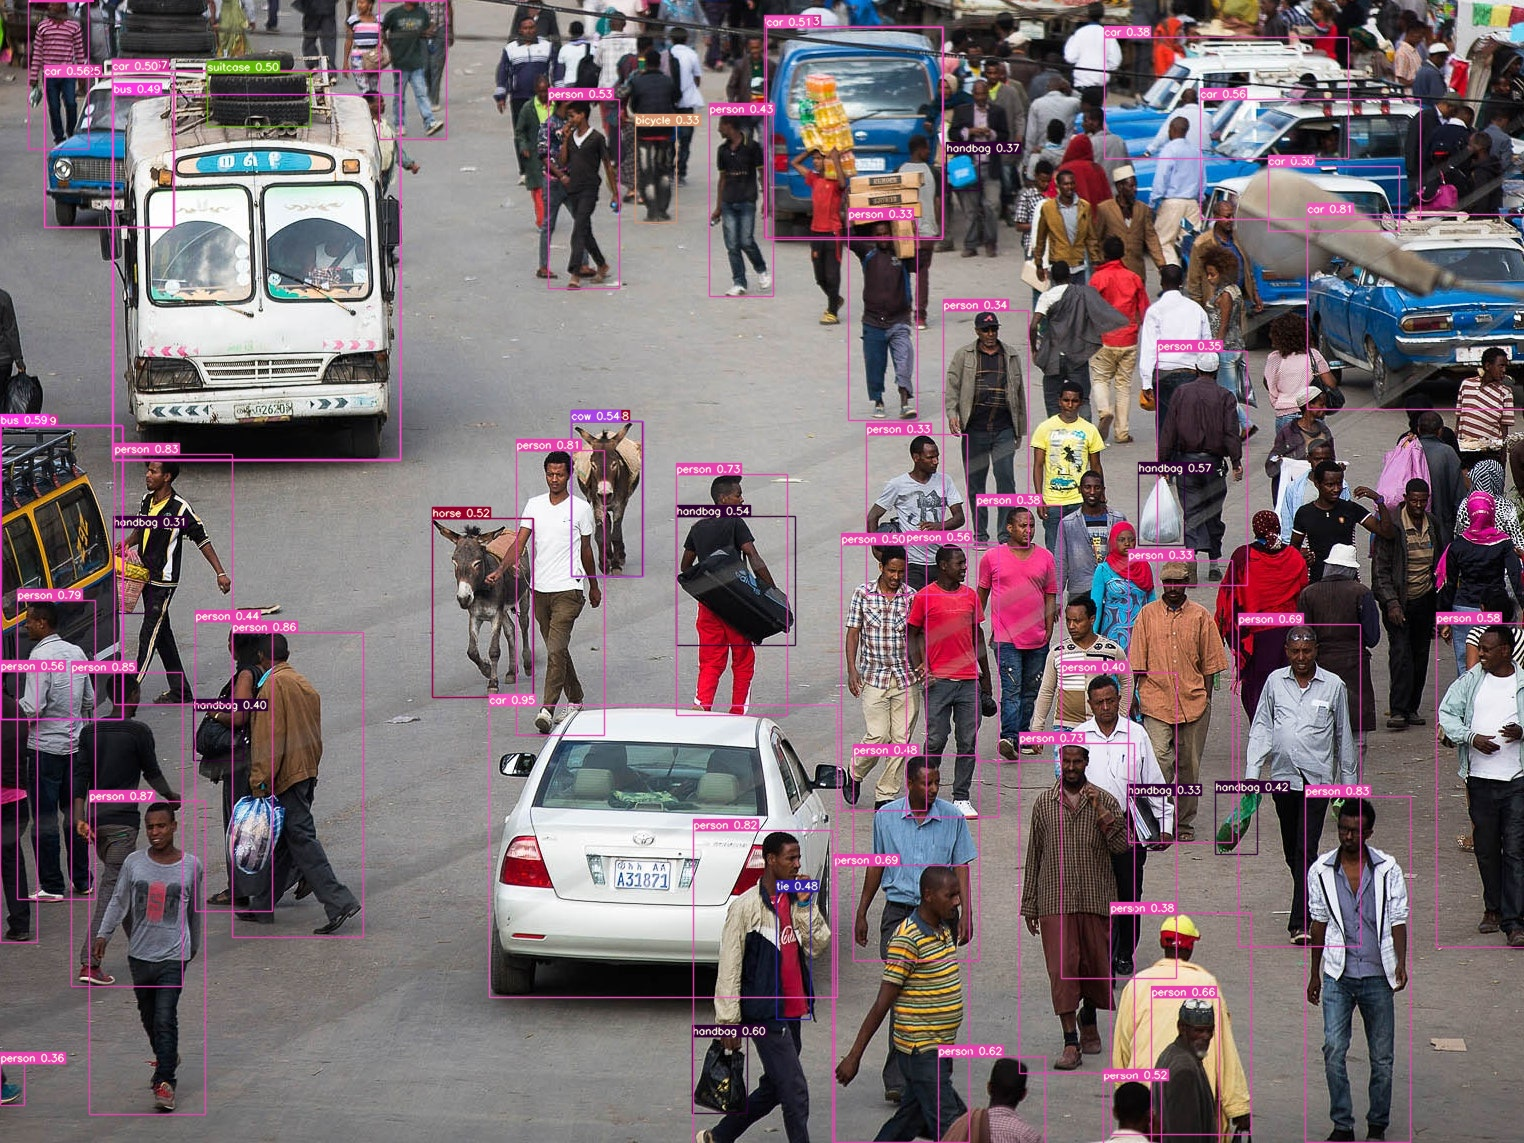

In [27]:
from IPython.display import Image, display
display(Image(filename='/content/drive/MyDrive/YOLOV7/yolov7/runs/detect/exp/Transpo-AddisAbabastreet-464372138.jpg'))

# Train model

In [28]:
# giải nén dữ liệu để train model
%cd /content/drive/MyDrive/YOLOV7
# tạo thư mục để lưu data vào
!mkdir train_data
%cd train_data
# unzip fire data
!unzip ../firedata.zip

/content/drive/MyDrive/YOLOV7
/content/drive/MyDrive/YOLOV7/train_data
Archive:  ../firedata.zip
  inflating: 000001.jpg              
  inflating: __MACOSX/._000001.jpg   
  inflating: 000001.txt              
  inflating: __MACOSX/._000001.txt   
  inflating: 000002.jpg              
  inflating: __MACOSX/._000002.jpg   
  inflating: 000002.txt              
  inflating: __MACOSX/._000002.txt   
  inflating: 000003.jpg              
  inflating: __MACOSX/._000003.jpg   
  inflating: 000004.jpg              
  inflating: __MACOSX/._000004.jpg   
  inflating: 000004.txt              
  inflating: __MACOSX/._000004.txt   
  inflating: 000005.jpg              
  inflating: __MACOSX/._000005.jpg   
  inflating: 000005.txt              
  inflating: __MACOSX/._000005.txt   
  inflating: 000006.jpg              
  inflating: __MACOSX/._000006.jpg   
  inflating: 000006.txt              
  inflating: __MACOSX/._000006.txt   
  inflating: 000007.jpg              
  inflating: __MACOSX/._00000

In [29]:
# tổ chức lại thư mục train-data, vì YOLO-V7  yêu cầu:
#train
#  -train
#  -label
#test
#  -train
#  -label

%cd /content/drive/MyDrive/YOLOV7/train_data
!mkdir train
!mkdir train/images
!mkdir train/labels

!mv *.jpg train/images
!mv *.txt train/labels

/content/drive/MyDrive/YOLOV7/train_data


In [35]:
# khai báo file yaml để YOLO V7 biết:
# đường dẫn đến thư mục train, test (nếu có , nếu không thì dùng luôn đường dẫn đến train )
# số lượng class qua biến nc (number of class)
# tên của các class

# tạo file yaml
%cd /content/drive/MyDrive/YOLOV7/yolov7
!rm data/mydataset.yaml # nếu có
!echo 'train: ../train_data/train' >> data/mydataset.yaml
!echo 'val: ../train_data/train' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['fire']" >> data/mydataset.yaml


/content/drive/MyDrive/YOLOV7/yolov7


In [37]:
# train model yolo v7 với dữ liệu file
%cd /content/drive/MyDrive/YOLOV7/yolov7
# cfg là confiuge, chọn mạng nào của tác giả
# weight nếu train từ đầu thì để ''
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 100 --data /mydataset.yaml --weights 'pretrain/yolov7.pt'

/content/drive/MyDrive/YOLOV7/yolov7
2023-06-15 04:35:40.388430: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 04:35:41.304250: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='pretrain/yolov7.pt', cfg='cfg/training/yolov7.yaml', data='./data/mydataset.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=100, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity

In [33]:
# nhận diện thử lwuar với weight đã train
%cd /content/drive/MyDrive/YOLOV7/yolov7

!python detect.py --weights pretrain/yolov7.pt --source test_images/Transpo-AddisAbabastreet-464372138.jpg

In [7]:
%cd /content/drive/MyDrive/YOLOV7/yolov7/test_images

!wget https://cdn.baogiaothong.vn/upload/images/2023-2/article_img/2023-04-20/img-bgt-2021-duong-1681960376-width1280height720.jpeg

/content/drive/MyDrive/YOLOV7/yolov7/test_images
--2023-06-15 07:36:05--  https://cdn.baogiaothong.vn/upload/images/2023-2/article_img/2023-04-20/img-bgt-2021-duong-1681960376-width1280height720.jpeg
Resolving cdn.baogiaothong.vn (cdn.baogiaothong.vn)... 185.81.209.130, 162.220.220.146
Connecting to cdn.baogiaothong.vn (cdn.baogiaothong.vn)|185.81.209.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142969 (140K) [image/jpeg]
Saving to: ‘img-bgt-2021-duong-1681960376-width1280height720.jpeg’

img-bgt-2021-duong- 100%[===================>] 139.62K  67.5KB/s    in 2.1s    

2023-06-15 07:36:09 (67.5 KB/s) - ‘img-bgt-2021-duong-1681960376-width1280height720.jpeg’ saved [142969/142969]



In [8]:
%cd /content/drive/MyDrive/YOLOV7/yolov7
!python detect.py --weights /content/drive/MyDrive/YOLOV7/yolov7/runs/train/exp/weights/last.pt --source /content/drive/MyDrive/YOLOV7/yolov7/test_images/img-bgt-2021-duong-1681960376-width1280height720.jpeg

/content/drive/MyDrive/YOLOV7/yolov7
Namespace(weights=['/content/drive/MyDrive/YOLOV7/yolov7/runs/train/exp/weights/last.pt'], source='/content/drive/MyDrive/YOLOV7/yolov7/test_images/img-bgt-2021-duong-1681960376-width1280height720.jpeg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summ

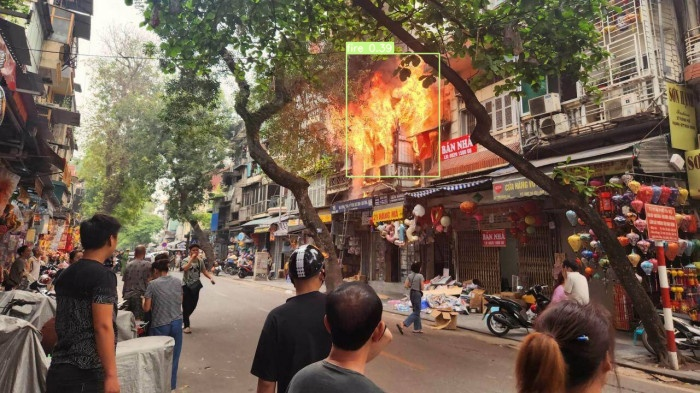

In [9]:
from IPython.display import Image, display
display(Image(filename='/content/drive/MyDrive/YOLOV7/yolov7/runs/detect/exp4/img-bgt-2021-duong-1681960376-width1280height720.jpeg'))

### nhận diện trực tiếp từ ảnh

In [10]:
# Import thư viện để nhận diện ảnh trong thực tế

import os
import sys
sys.path.append('/content/gdrive/MyDrive/yolov7')


import argparse
import time
from pathlib import Path
import cv2
import torch
import numpy as np
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, apply_classifier, \
    scale_coords, xyxy2xywh, strip_optimizer, set_logging, increment_path
from utils.plots import plot_one_box
from utils.torch_utils import select_device, load_classifier, time_synchronized, TracedModel

def letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)


In [11]:

classes_to_filter = None  #You can give list of classes to filter by name, Be happy you don't have to put class number. ['train','person' ]
source_image_path = "/content/drive/MyDrive/YOLOV7/yolov7/test_images/img-bgt-2021-duong-1681960376-width1280height720.jpeg"

opt  = {

    "weights": "/content/drive/MyDrive/YOLOV7/yolov7/runs/train/exp/weights/last.pt", # Path to weights file default weights are for nano model
    "yaml"   : "/content/drive/MyDrive/YOLOV7/yolov7/data/mydataset.yaml",
    "img-size": 640, # default image size
    "conf-thres": 0.1, # confidence threshold for inference.
    "iou-thres" : 0.45, # NMS IoU threshold for inference.
    "device" : '0',  # device to run our model i.e. 0 or 0,1,2,3 or cpu
    "classes" : classes_to_filter  # list of classes to filter or None

}

In [12]:
with torch.no_grad():
  weights, imgsz = opt['weights'], opt['img-size']
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # load FP32 model
  stride = int(model.stride.max())  # model stride
  imgsz = check_img_size(imgsz, s=stride)  # check img_size
  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

  img0 = cv2.imread(source_image_path)
  img = letterbox(img0, imgsz, stride=stride)[0]
  img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
  img = np.ascontiguousarray(img)
  img = torch.from_numpy(img).to(device)
  img = img.half() if half else img.float()  # uint8 to fp16/32
  img /= 255.0  # 0 - 255 to 0.0 - 1.0
  if img.ndimension() == 3:
    img = img.unsqueeze(0)

  # Inference
  t1 = time_synchronized()
  pred = model(img, augment= False)[0]

  # Apply NMS
  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:

      classes.append(opt['classes'].index(class_name))


  pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
  t2 = time_synchronized()
  for i, det in enumerate(pred):
    s = ''
    s += '%gx%g ' % img.shape[2:]  # print string
    gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
    if len(det):
      det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

      for c in det[:, -1].unique():
        n = (det[:, -1] == c).sum()  # detections per class
        s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

      for *xyxy, conf, cls in reversed(det):

        label = f'{names[int(cls)]} {conf:.2f}'
        plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=3)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


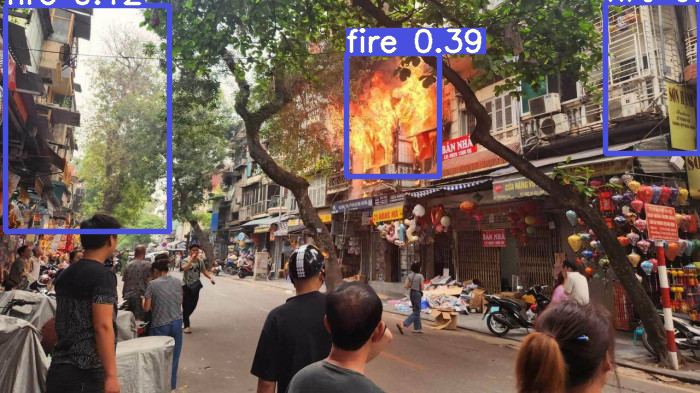

In [13]:

from google.colab.patches import cv2_imshow
cv2_imshow(img0)